In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as mat
import random 

sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#create a folder hack and upload the csv to your google drive
#click the mount drive button in left of this window (in the storage section)
#then click run
#it is better to create a copy of this notebook and do
datam=pd.read_csv("/content/drive/My Drive/hack/Training-Data-Sets - NEWDATA.csv")
(datam.head())

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


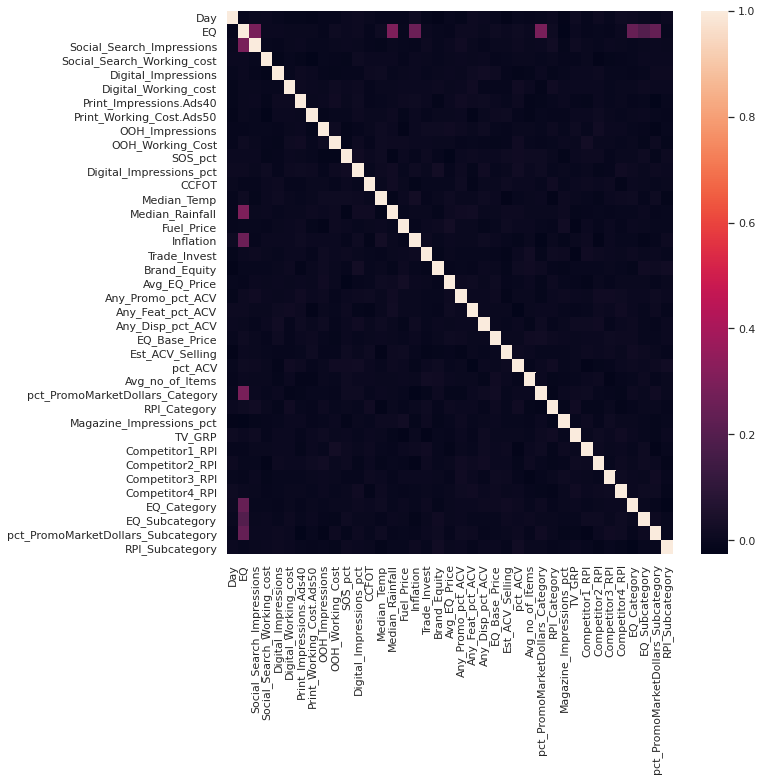

In [4]:
mat.figure(figsize=(10,10))
corre=datam.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

In [5]:
datam.isnull().any()


Day                                   False
EQ                                    False
Social_Search_Impressions             False
Social_Search_Working_cost            False
Digital_Impressions                   False
Digital_Working_cost                  False
Print_Impressions.Ads40               False
Print_Working_Cost.Ads50              False
OOH_Impressions                       False
OOH_Working_Cost                      False
SOS_pct                               False
Digital_Impressions_pct               False
CCFOT                                 False
Median_Temp                           False
Median_Rainfall                       False
Fuel_Price                            False
Inflation                             False
Trade_Invest                          False
Brand_Equity                          False
Avg_EQ_Price                          False
Any_Promo_pct_ACV                     False
Any_Feat_pct_ACV                      False
Any_Disp_pct_ACV                

In [6]:
datam

,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2590.892697,25770808,97737,2185034,5998,147474,176056,86438176,1616130,27,11,25,33,0.71889,8.459,0.116807,771,42.41,54.66,10.377,5.50,4.071,1.550,606389969,34.07,2.6873,0.18239,35.898,74.08,19.09,104.12,33.95,45.16,78.51,8272828,457864,0.3466,45.62
11996,11997,156.792378,37456881,63451,12303996,186513,248001,112522,721308843,1767765,48,15,40,37,0.49258,8.193,0.065009,633,43.90,44.96,14.541,1.89,3.166,1.557,616281350,42.00,2.7710,0.05693,43.680,49.05,36.98,110.44,32.43,43.95,78.55,4472051,458844,0.2238,38.29
11997,11998,208.095996,24982441,121518,8765824,61403,110445,144528,676086883,3122744,14,26,74,56,0.99117,8.787,0.074154,7724,43.00,48.26,10.012,3.03,1.021,1.455,393487089,18.29,2.3028,0.36290,36.150,22.32,32.32,109.93,40.51,48.42,74.72,1575934,563762,0.0703,44.99
11998,11999,214.557394,35213911,47191,12857291,135013,275713,56677,117846954,2635366,6,42,14,40,0.41459,8.422,0.021332,5490,43.06,54.19,2.679,2.75,4.293,1.474,545095799,15.98,2.4502,0.42034,42.832,73.26,32.73,105.35,42.94,44.48,63.15,9391109,582726,0.0599,32.88


,Day,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
10540,10541,7.481588,4934406,87720,8289094,187551,139492,86770,374027586,1671519,15,19,66,45,0.20312,8.718,0.089494,1441,42.99,50.85,3.780,4.18,1.576,1.416,490907256,38.43,2.4359,0.10652,42.663,44.92,36.69,100.15,38.24,45.75,65.88,5337087,463557,0.0633,43.97
10541,10542,2869.451958,16781736,123111,11358861,155981,59935,30248,574639334,1553895,24,20,59,73,0.74438,9.435,0.087309,1123,43.96,55.36,12.767,3.81,3.961,1.622,827941752,22.91,2.8546,0.24996,42.309,60.09,17.08,109.83,38.75,49.04,72.47,6652164,891157,0.3551,36.16
10542,10543,596.901204,17803046,33316,4998790,72798,213938,86063,550017782,1259405,49,40,72,64,0.59186,9.425,0.098590,4688,42.66,56.92,8.903,3.34,1.023,1.658,611745366,42.07,2.6019,0.18205,40.461,59.83,21.34,110.23,32.05,47.79,62.75,2713981,811545,0.2866,42.23
10543,10544,10.405372,31293295,103645,7511412,398125,56677,27494,709136797,2402627,35,36,25,47,0.02961,7.425,0.072624,1280,42.85,54.67,14.315,5.32,1.729,1.529,379638118,28.82,2.8085,0.33160,43.662,41.12,22.09,94.08,37.73,49.17,69.28,2793849,478925,0.0697,34.01
10544,10545,733.257921,17192250,87003,10222923,125075,66413,73141,577574628,2536818,12,19,95,33,0.24813,7.385,0.094041,6917,43.55,49.68,2.701,3.52,1.822,1.472,276305313,20.42,2.2222,0.23986,37.726,55.06,19.06,101.82,44.70,46.18,72.18,7315113,577447,0.3608,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2590.892697,25770808,97737,2185034,5998,147474,176056,86438176,1616130,27,11,25,33,0.71889,8.459,0.116807,771,42.41,54.66,10.377,5.50,4.071,1.550,606389969,34.07,2.6873,0.18239,35.898,74.08,19.09,104.12,33.95,45.16,78.51,8272828,457864,0.3466,45.62
11996,11997,156.792378,37456881,63451,12303996,186513,248001,112522,721308843,1767765,48,15,40,37,0.49258,8.193,0.065009,633,43.90,44.96,14.541,1.89,3.166,1.557,616281350,42.00,2.7710,0.05693,43.680,49.05,36.98,110.44,32.43,43.95,78.55,4472051,458844,0.2238,38.29
11997,11998,208.095996,24982441,121518,8765824,61403,110445,144528,676086883,3122744,14,26,74,56,0.99117,8.787,0.074154,7724,43.00,48.26,10.012,3.03,1.021,1.455,393487089,18.29,2.3028,0.36290,36.150,22.32,32.32,109.93,40.51,48.42,74.72,1575934,563762,0.0703,44.99
11998,11999,214.557394,35213911,47191,12857291,135013,275713,56677,117846954,2635366,6,42,14,40,0.41459,8.422,0.021332,5490,43.06,54.19,2.679,2.75,4.293,1.474,545095799,15.98,2.4502,0.42034,42.832,73.26,32.73,105.35,42.94,44.48,63.15,9391109,582726,0.0599,32.88


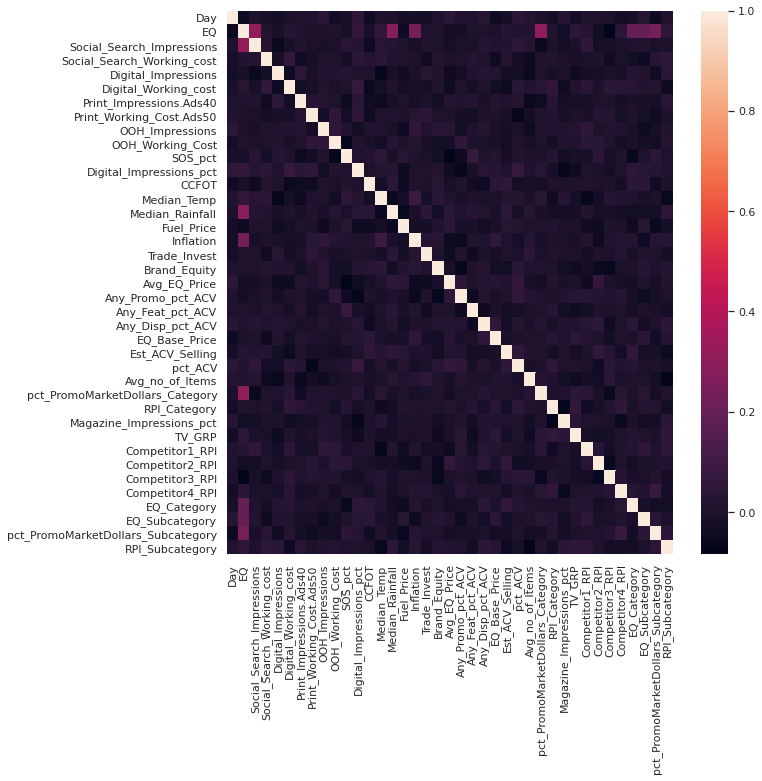

In [7]:
datam_short=datam[datam['Day']>10540]

mat.figure(figsize=(10,10))
corre=datam_short.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)
datam_short

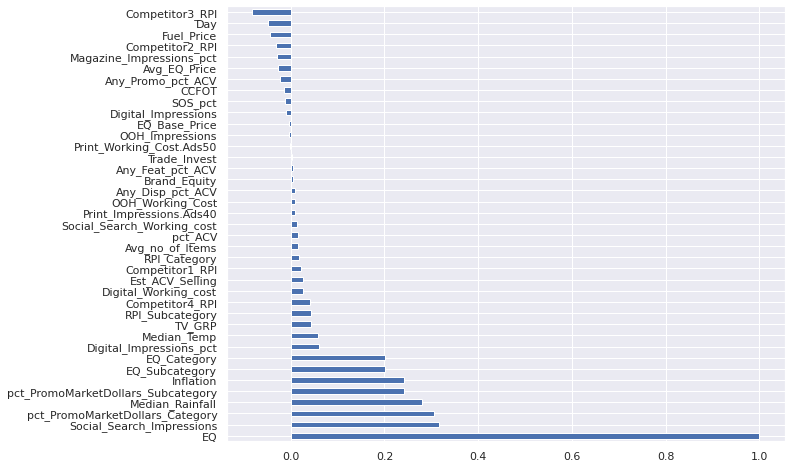

In [8]:
mat.figure(figsize=(10,8))
(corre
     .EQ
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
dataq=datam_short


In [10]:
'''ssi= datam[['EQ','Social_Search_Impressions']].groupby('Social_Search_Impressions')
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=states.index, y=states['Social_Search_Impressions'], palette= sns.color_palette("muted"))
ax.set_ylabel("Social_Search_Impressions")
ax.set_xlabel("EQ")
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig=plt.gcf()
fig.set_size_inches(18.5, 10.5)
'''


'ssi= datam[[\'EQ\',\'Social_Search_Impressions\']].groupby(\'Social_Search_Impressions\')\nplt.figure(figsize=(8, 5))\nax = sns.barplot(x=states.index, y=states[\'Social_Search_Impressions\'], palette= sns.color_palette("muted"))\nax.set_ylabel("Social_Search_Impressions")\nax.set_xlabel("EQ")\nfor item in ax.get_xticklabels():\n    item.set_rotation(90)\nfig=plt.gcf()\nfig.set_size_inches(18.5, 10.5)\n'

In [0]:
avglst=[]


In [0]:
dataq=dataq[dataq['Day']<0]
for i in range(0,12000,15):
  f=i
  l=i+15
  avglst=[]
  for cols in datam:
    avglst.append(round(datam[cols].iloc[f:l].mean(),2))
  temp=pd.DataFrame([avglst], columns=datam.columns.to_list())
  dataq=dataq.append(temp)
dataq.reset_index(drop=True,inplace=True)
dataq.drop(columns={'Day'},inplace=True)
#dataq.reset_index()


In [13]:
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']
datam=dataq
for cols in datam:
  mat.style.use('ggplot')
  mat.figure(figsize=(10,10))

  mat.plot(datam.index,datam[cols],color=random.choice(set_of_colors))
  mat.xlabel('Date') 
  mat.ylabel(cols)
  mat.title(cols+' vs Time')
  mat.show()


Output hidden; open in https://colab.research.google.com to view.

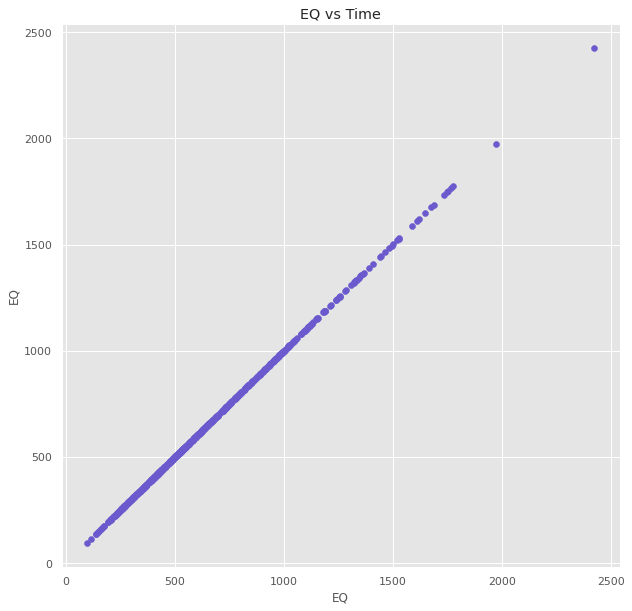

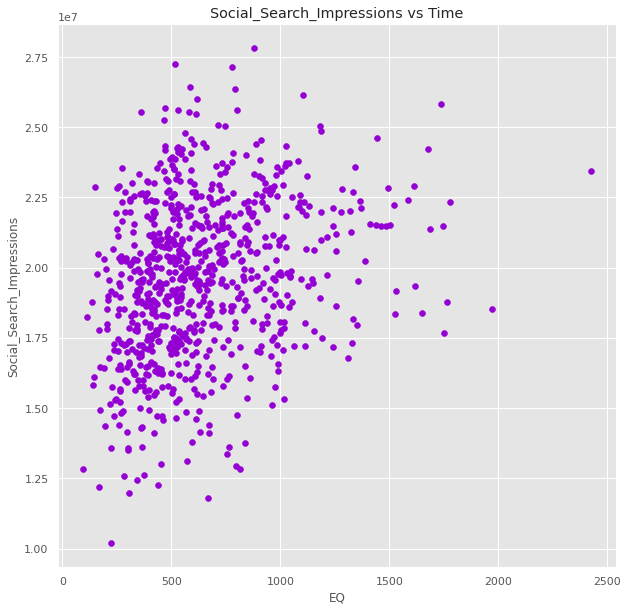

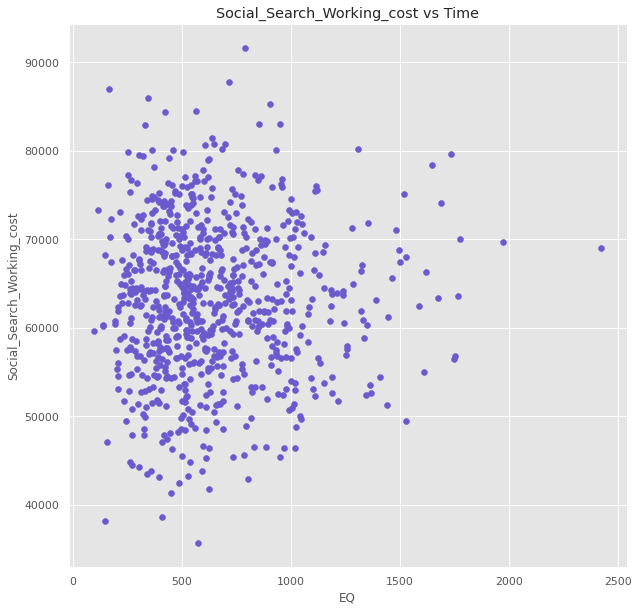

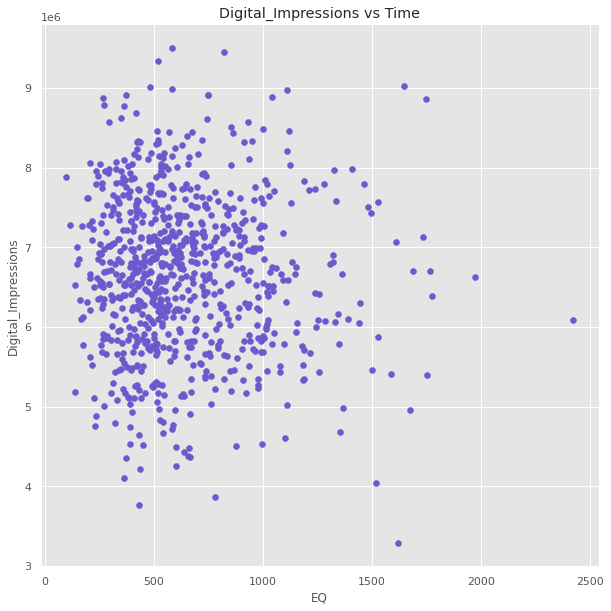

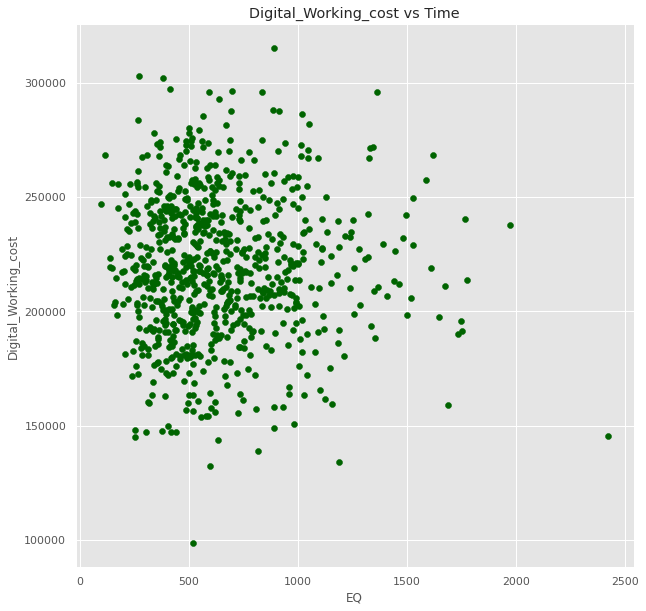

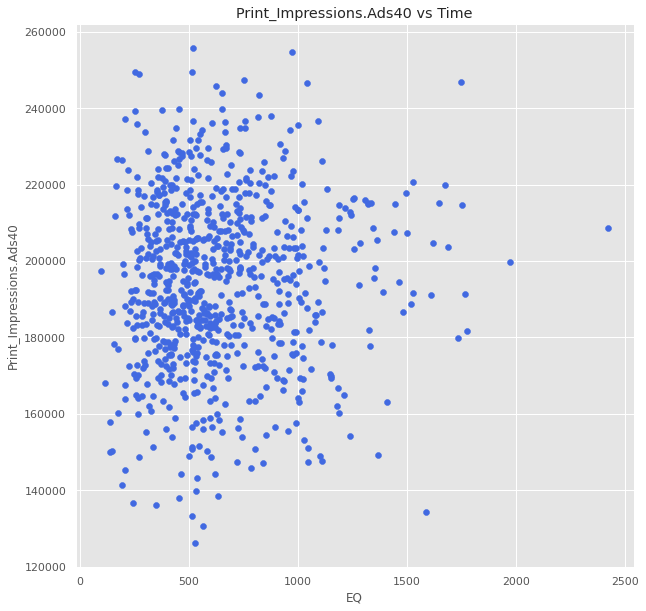

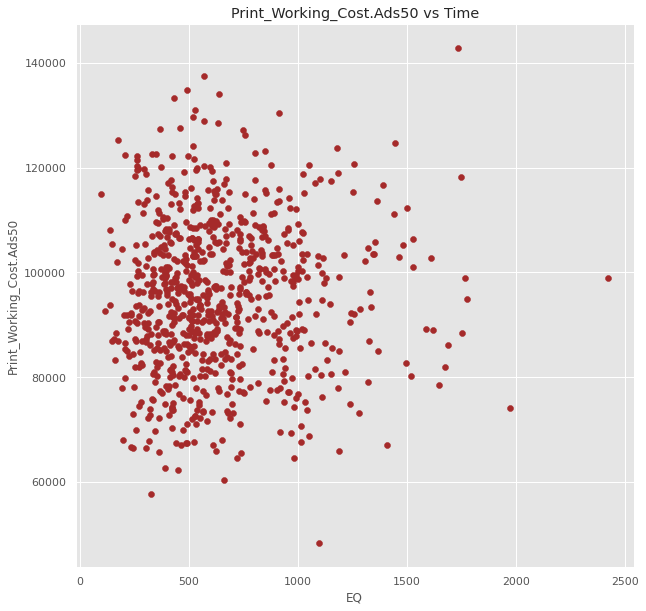

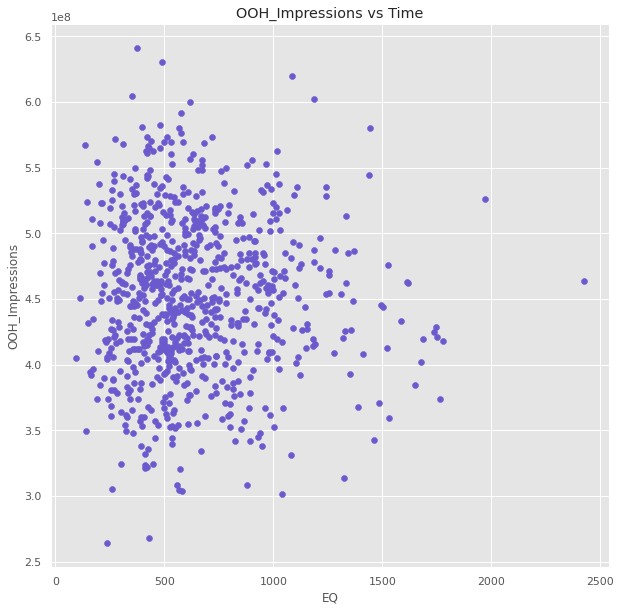

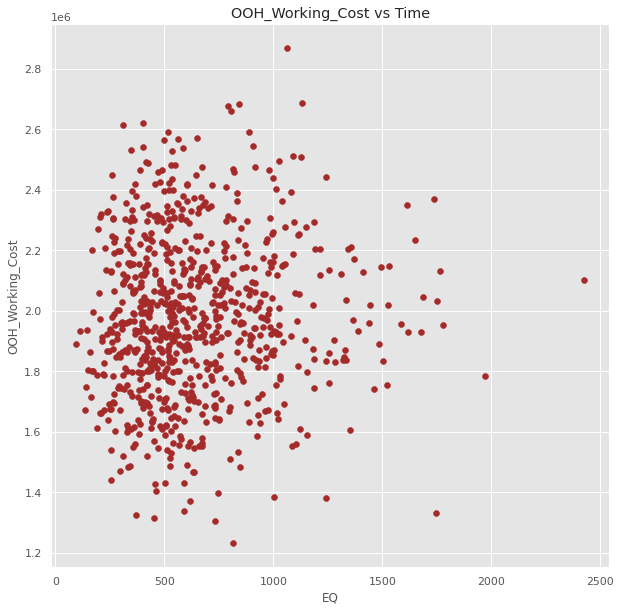

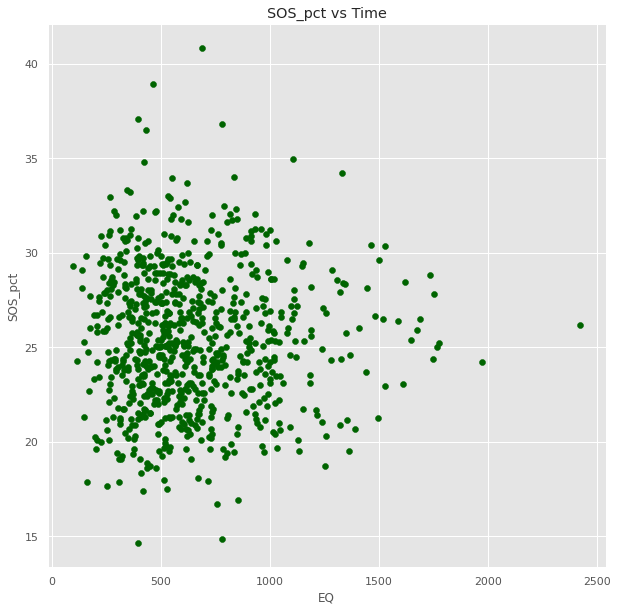

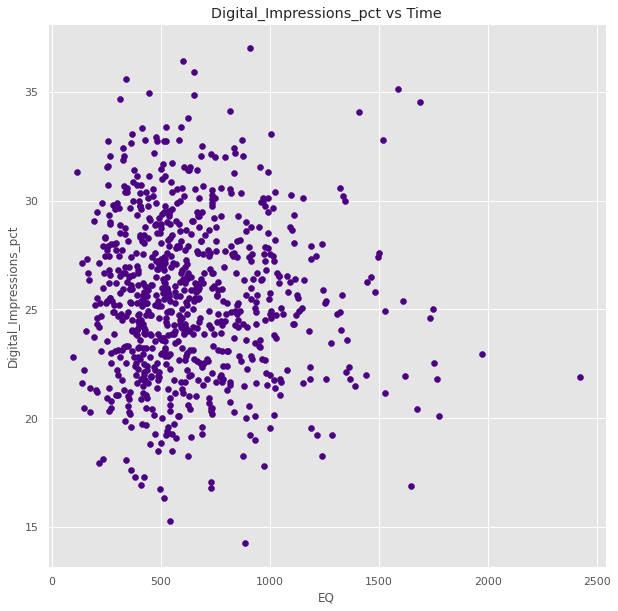

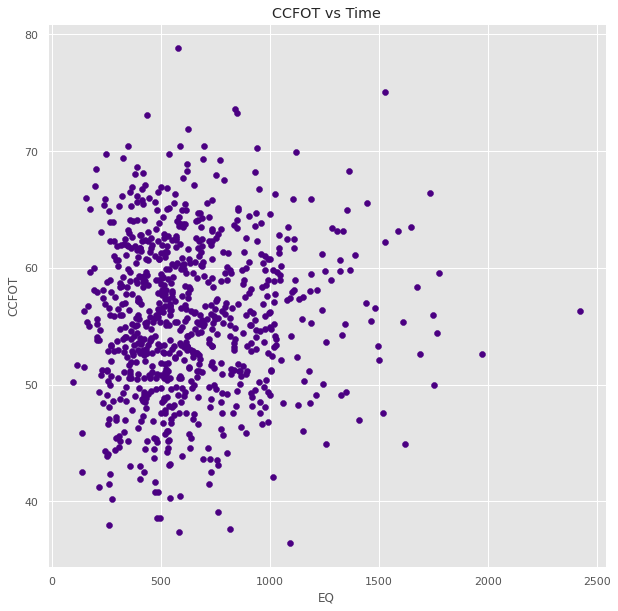

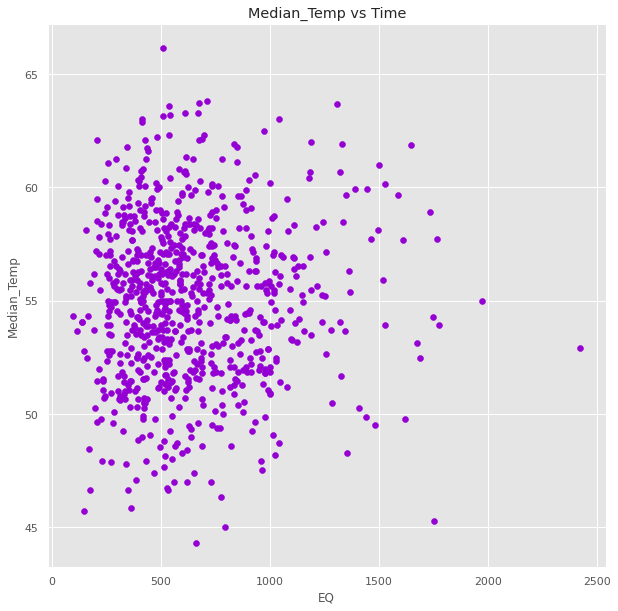

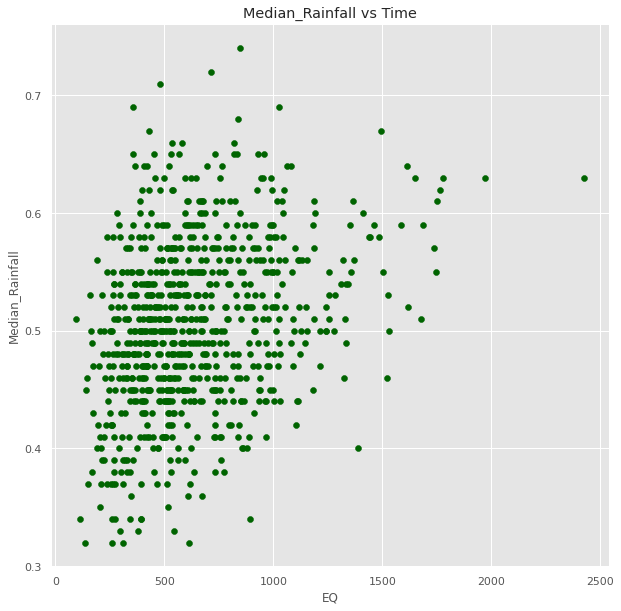

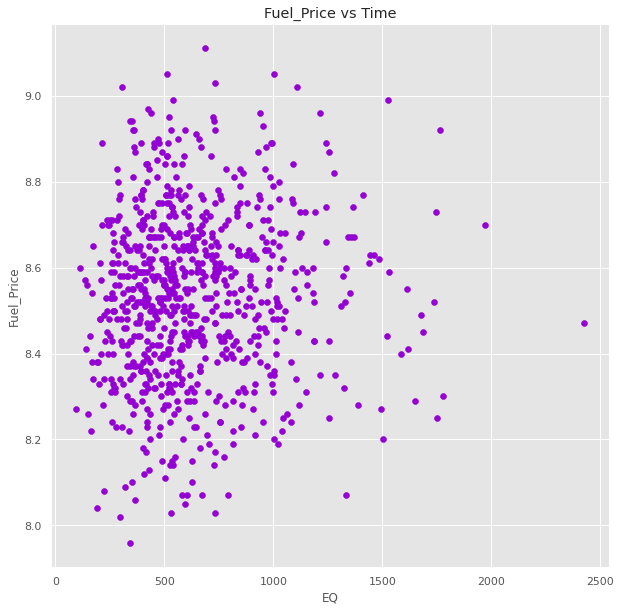

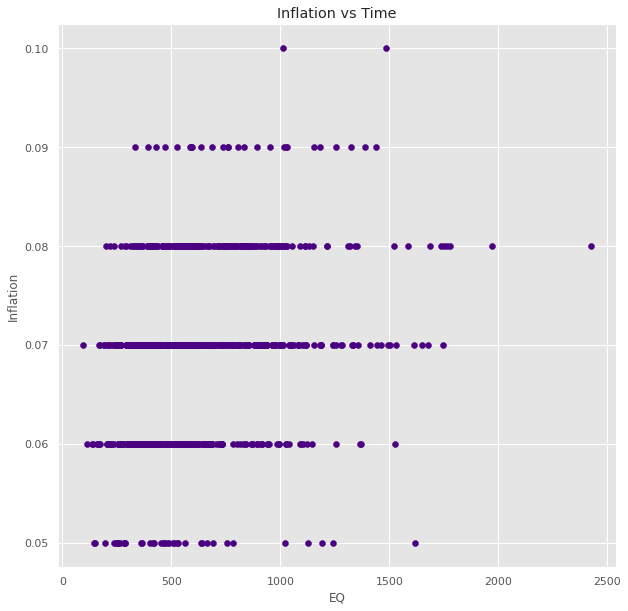

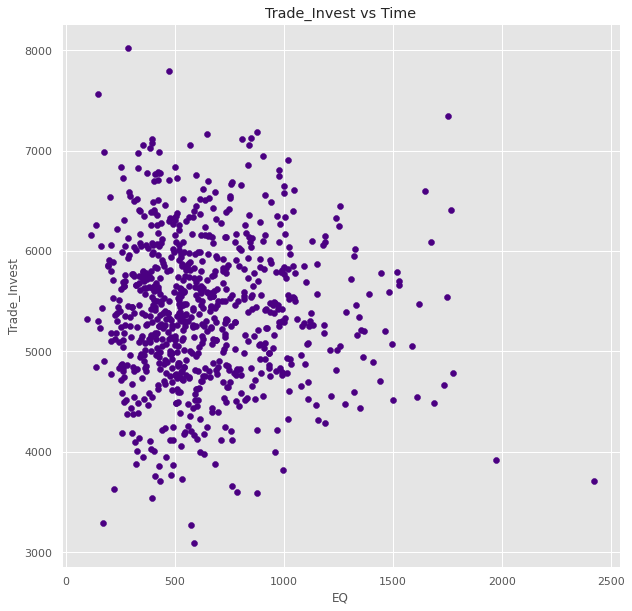

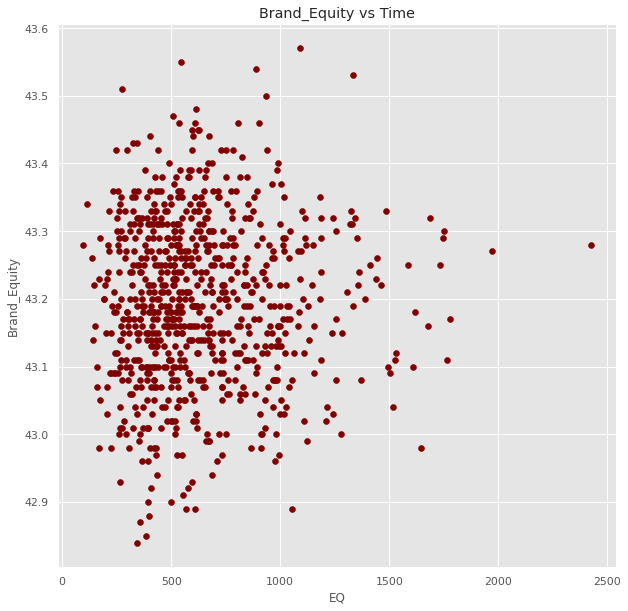

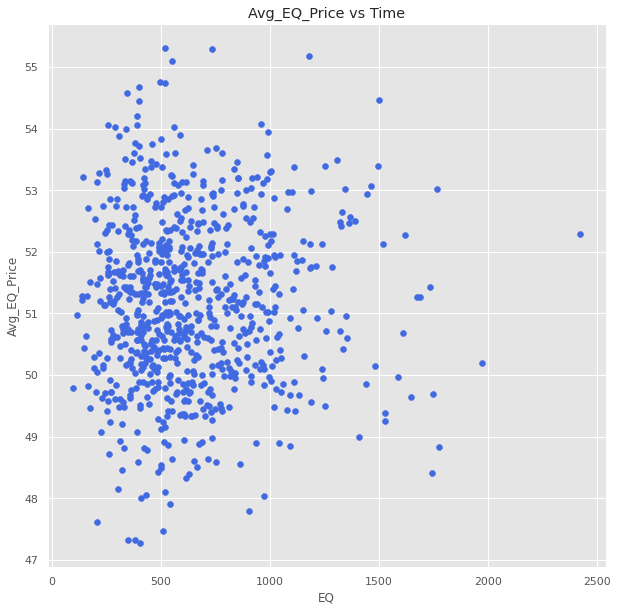

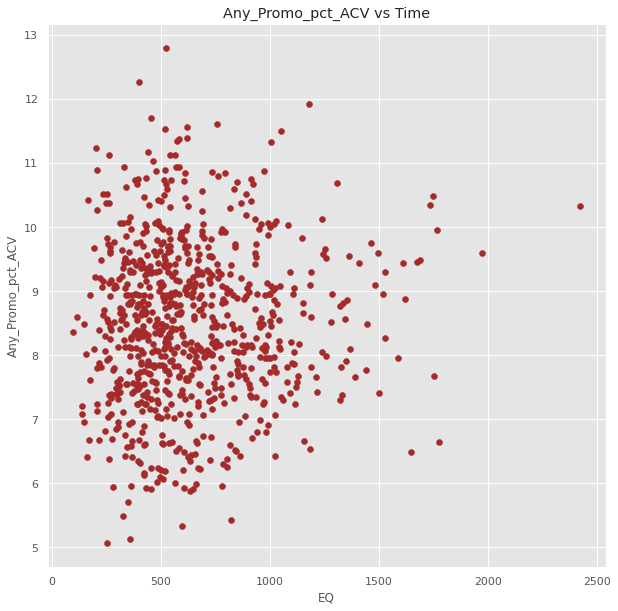

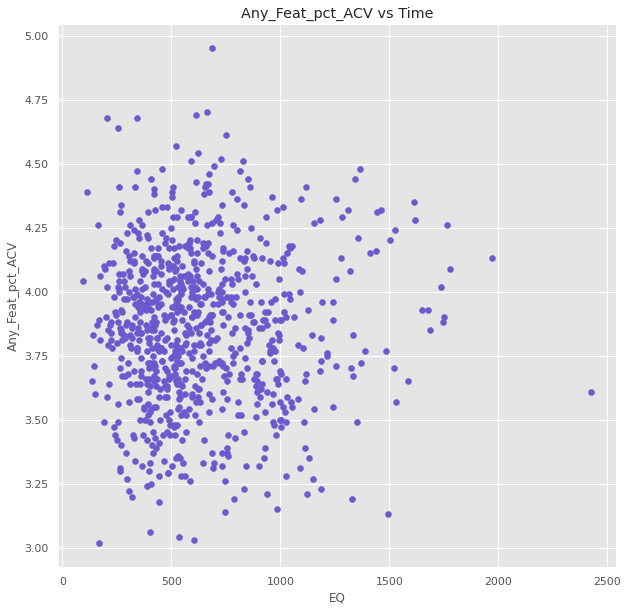

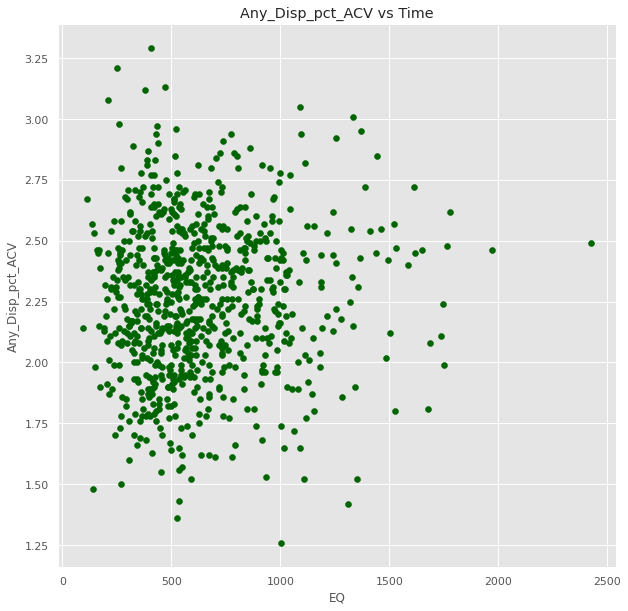

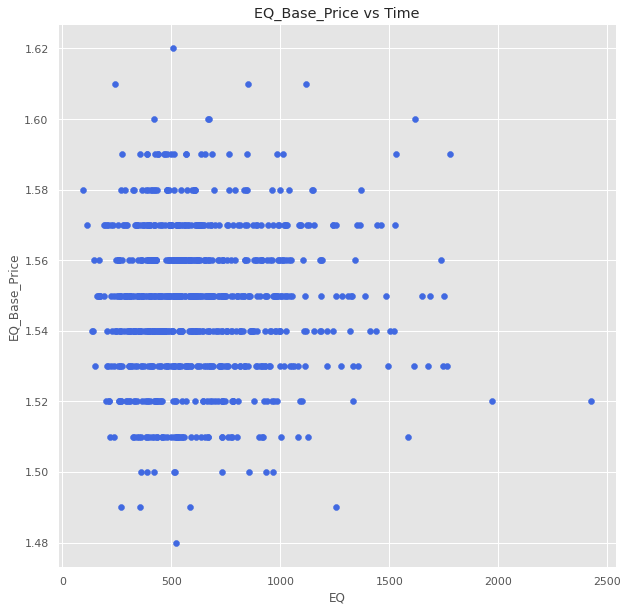

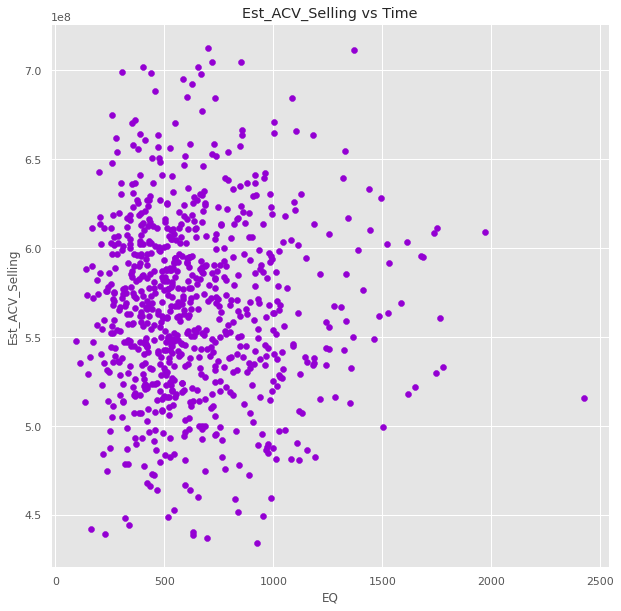

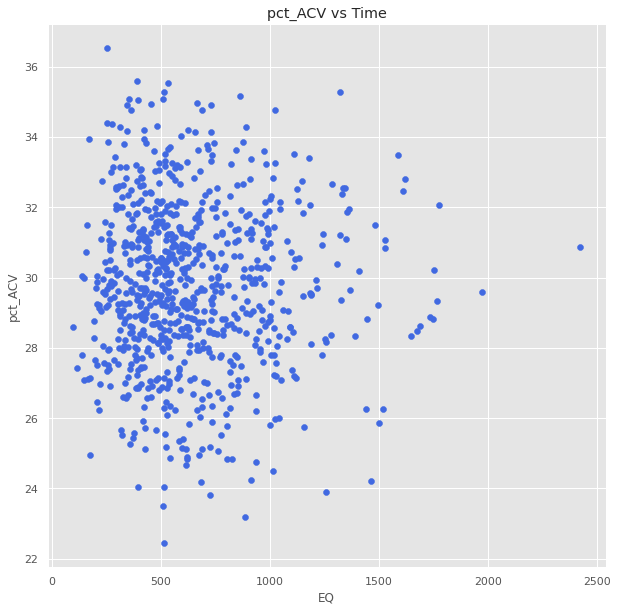

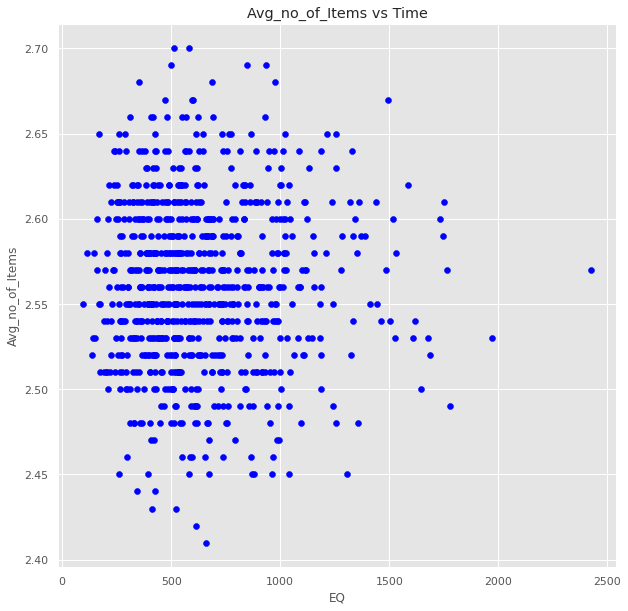

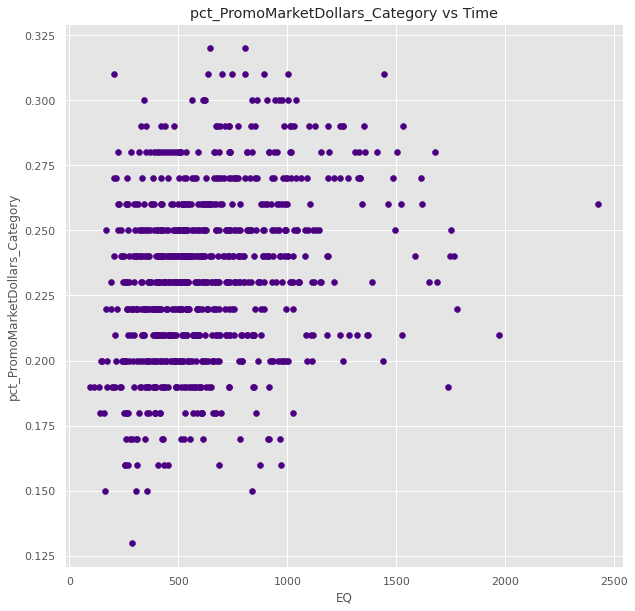

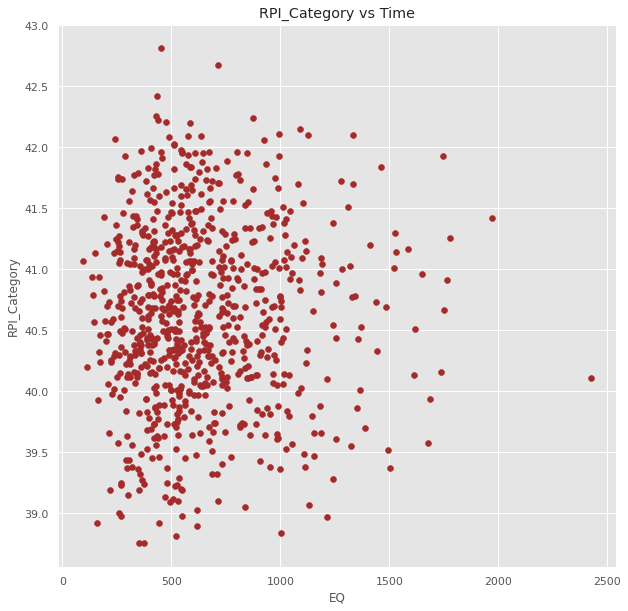

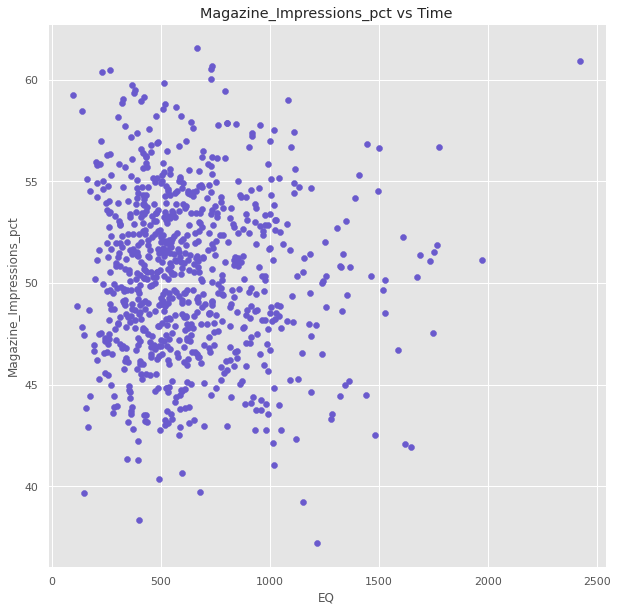

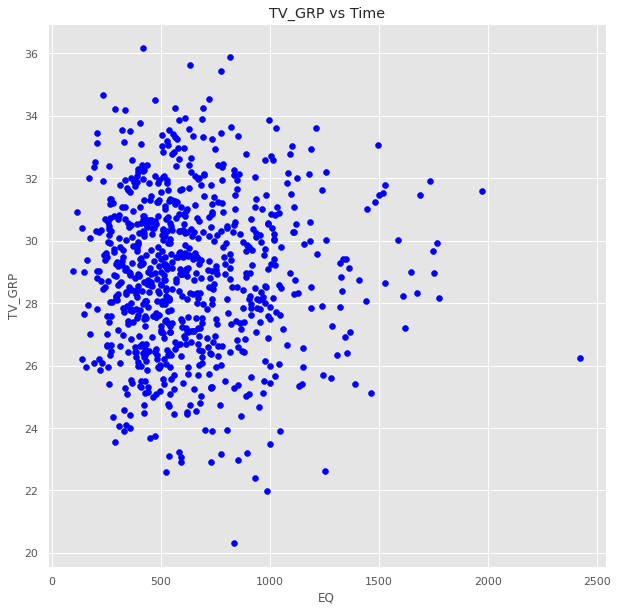

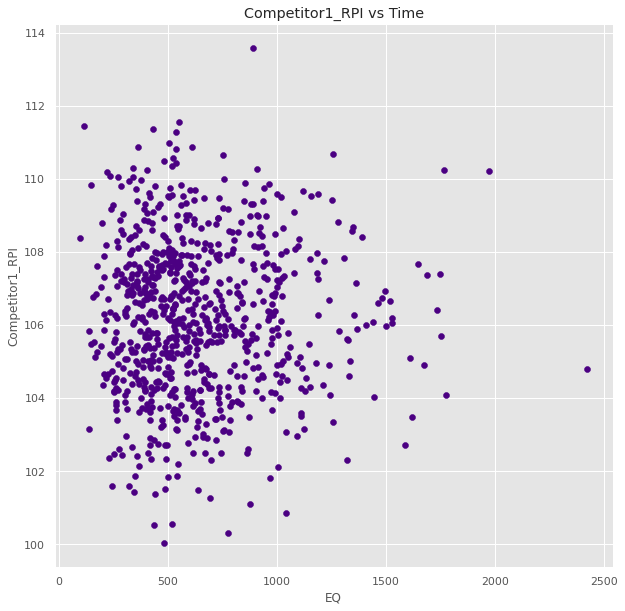

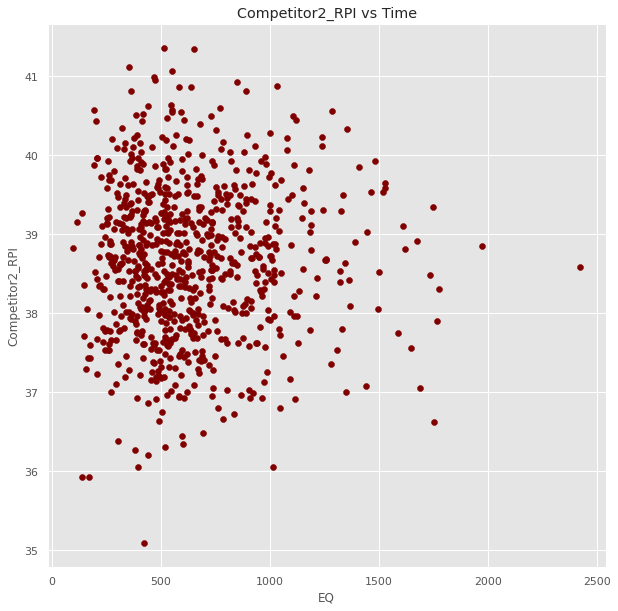

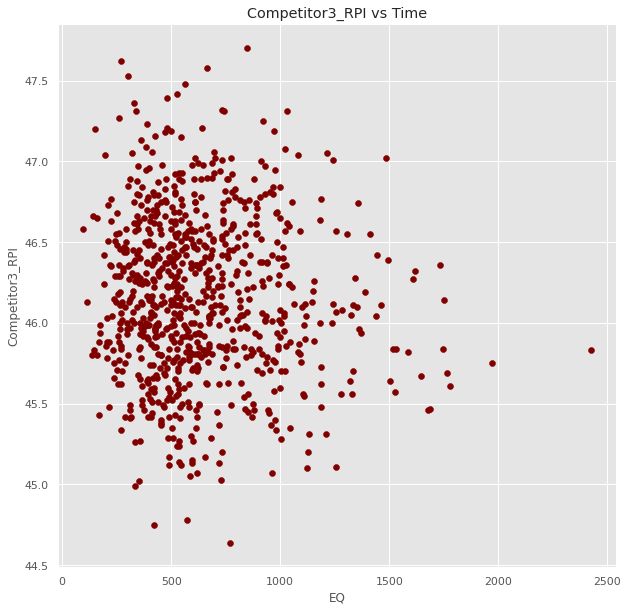

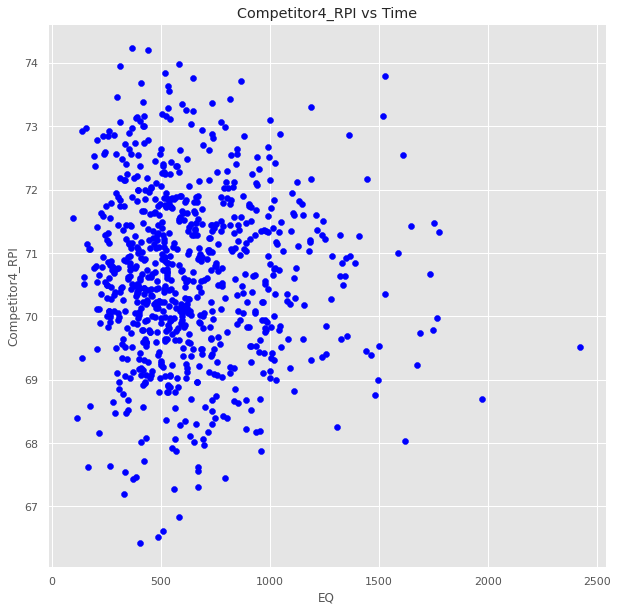

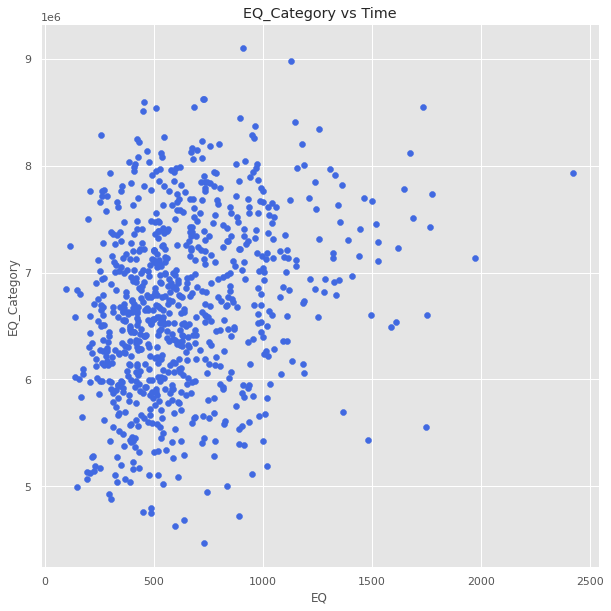

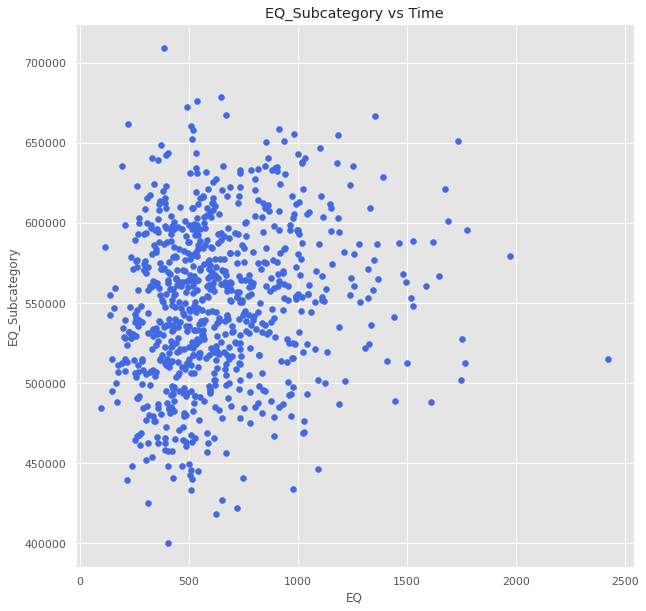

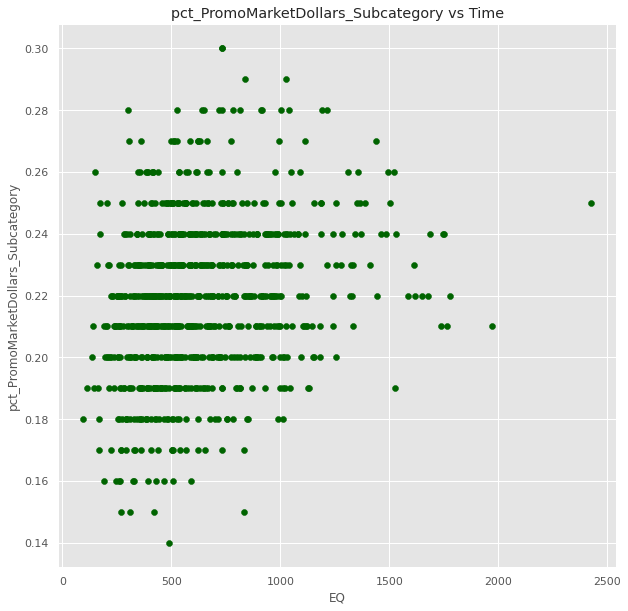

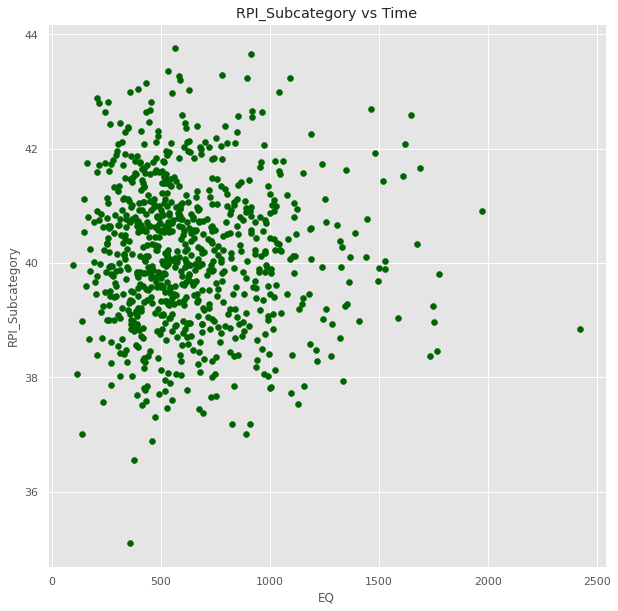

In [14]:
set_of_colors=['blue','darkgreen','brown','royalblue','maroon','darkviolet','slateblue','indigo']
datam=dataq
for cols in datam:
  mat.style.use('ggplot')
  mat.figure(figsize=(10,10))

  mat.scatter(datam['EQ'],datam[cols],color=random.choice(set_of_colors))
  mat.xlabel('EQ') 
  mat.ylabel(cols)
  mat.title(cols+' vs Time')
  mat.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


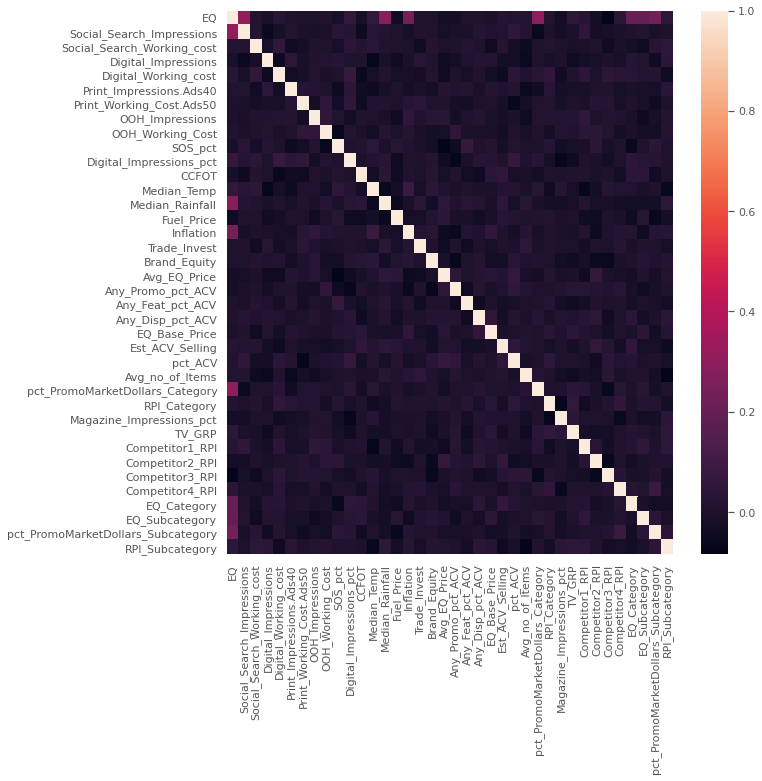

In [15]:
datam=datam_short
datam.drop(columns={'Day'},inplace=True)

#dataq=dataq[dataq['Day']<700]
mat.figure(figsize=(10,10))
corre=datam.corr()
#corre=corre.abs()
ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

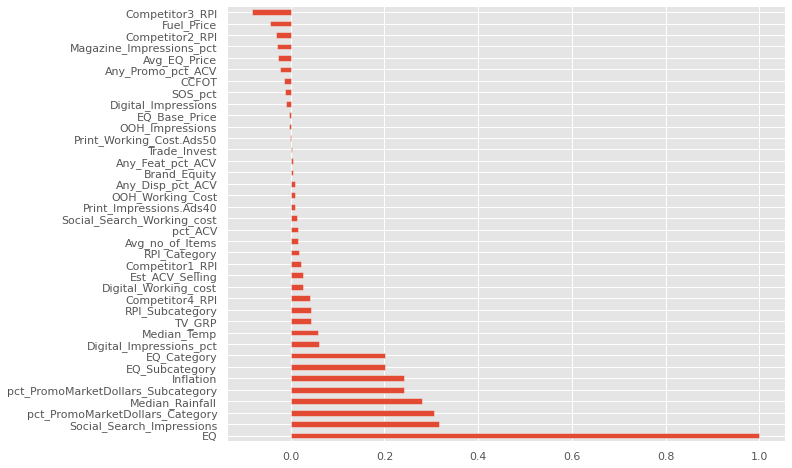

In [16]:
mat.figure(figsize=(10,8))
(corre
     .EQ
     .sort_values(ascending=False)
     .plot
     .barh())

In [0]:
#defing the function
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
grangers_causation_matrix(datam, variables = datam.columns)        

,EQ_x,Social_Search_Impressions_x,Social_Search_Working_cost_x,Digital_Impressions_x,Digital_Working_cost_x,Print_Impressions.Ads40_x,Print_Working_Cost.Ads50_x,OOH_Impressions_x,OOH_Working_Cost_x,SOS_pct_x,Digital_Impressions_pct_x,CCFOT_x,Median_Temp_x,Median_Rainfall_x,Fuel_Price_x,Inflation_x,Trade_Invest_x,Brand_Equity_x,Avg_EQ_Price_x,Any_Promo_pct_ACV_x,Any_Feat_pct_ACV_x,Any_Disp_pct_ACV_x,EQ_Base_Price_x,Est_ACV_Selling_x,pct_ACV_x,Avg_no_of_Items_x,pct_PromoMarketDollars_Category_x,RPI_Category_x,Magazine_Impressions_pct_x,TV_GRP_x,Competitor1_RPI_x,Competitor2_RPI_x,Competitor3_RPI_x,Competitor4_RPI_x,EQ_Category_x,EQ_Subcategory_x,pct_PromoMarketDollars_Subcategory_x,RPI_Subcategory_x
EQ_y,1.0000,0.1280,0.0325,0.3676,0.4286,0.5171,0.3502,0.0643,0.0653,0.4221,0.6112,0.0113,0.1802,0.5585,0.1995,0.5798,0.2399,0.1262,0.3979,0.2673,0.0753,0.7108,0.2424,0.2025,0.2256,0.0010,0.3208,0.3962,0.3668,0.1420,0.1364,0.0693,0.1669,0.0012,0.3904,0.0017,0.1238,0.1767
Social_Search_Impressions_y,0.0288,1.0000,0.0681,0.1155,0.3915,0.0505,0.2291,0.5092,0.1610,0.3843,0.6214,0.6515,0.6598,0.1945,0.4196,0.0201,0.0580,0.0769,0.3595,0.2346,0.4309,0.8674,0.0069,0.5444,0.2485,0.0106,0.6487,0.0715,0.2026,0.0067,0.2756,0.3873,0.2137,0.1441,0.3370,0.0679,0.0185,0.6986
Social_Search_Working_cost_y,0.0033,0.2258,1.0000,0.2895,0.6079,0.0593,0.1747,0.6734,0.2657,0.0932,0.1096,0.1611,0.0269,0.2572,0.1641,0.1856,0.0596,0.3263,0.1377,0.0328,0.7870,0.1129,0.4282,0.1836,0.0083,0.2063,0.0986,0.0529,0.6869,0.1779,0.2929,0.5084,0.0457,0.4422,0.6027,0.1103,0.0029,0.1455
Digital_Impressions_y,0.0408,0.6679,0.1126,1.0000,0.6554,0.2410,0.4813,0.0362,0.1073,0.1877,0.3330,0.1738,0.1767,0.5293,0.0626,0.1851,0.7046,0.4611,0.8815,0.4311,0.1038,0.1171,0.0857,0.2120,0.0320,0.0648,0.5236,0.5123,0.3575,0.0833,0.4874,0.0934,0.3638,0.2682,0.2489,0.4419,0.6300,0.3312
Digital_Working_cost_y,0.0353,0.2238,0.5374,0.0025,1.0000,0.2745,0.7458,0.4005,0.0740,0.0965,0.0921,0.2052,0.4613,0.0185,0.0273,0.0145,0.4247,0.0456,0.1758,0.2788,0.0821,0.0136,0.8190,0.1938,0.0416,0.0449,0.2222,0.0700,0.1311,0.2734,0.1933,0.6905,0.5296,0.7608,0.2701,0.0620,0.1955,0.7795
Print_Impressions.Ads40_y,0.0532,0.0467,0.0084,0.1117,0.1814,1.0000,0.0376,0.0753,0.1499,0.0587,0.3639,0.3197,0.4071,0.0242,0.2281,0.0279,0.2128,0.0119,0.3756,0.7358,0.2618,0.1826,0.3974,0.2393,0.0643,0.0848,0.1332,0.1193,0.2459,0.3634,0.2655,0.6765,0.0073,0.0754,0.0716,0.1774,0.1515,0.0774
Print_Working_Cost.Ads50_y,0.1018,0.1027,0.0248,0.4734,0.4236,0.0055,1.0000,0.0640,0.6742,0.0948,0.1293,0.0997,0.1905,0.5437,0.4975,0.3961,0.0896,0.5749,0.2032,0.1682,0.5188,0.4114,0.3978,0.0701,0.6325,0.4808,0.0616,0.2555,0.2103,0.0560,0.3480,0.0285,0.0165,0.0221,0.0005,0.3569,0.0077,0.3271
OOH_Impressions_y,0.6078,0.1804,0.0992,0.0955,0.0483,0.0456,0.3787,1.0000,0.0546,0.3657,0.0472,0.6513,0.5169,0.4438,0.3544,0.3212,0.0650,0.2386,0.1846,0.0279,0.3792,0.4993,0.0873,0.1008,0.7644,0.3996,0.1236,0.3411,0.8187,0.1301,0.0522,0.7761,0.0471,0.8405,0.0528,0.0875,0.4070,0.5258
OOH_Working_Cost_y,0.1679,0.0585,0.2687,0.2552,0.0240,0.2331,0.0107,0.3273,1.0000,0.2410,0.0111,0.3384,0.0525,0.0812,0.0312,0.1066,0.0558,0.3158,0.1662,0.0121,0.0576,0.2710,0.6110,0.0299,0.1322,0.1634,0.1379,0.0362,0.3039,0.1198,0.0155,0.1761,0.0237,0.7445,0.6312,0.3180,0.6270,0.0441
SOS_pct_y,0.2146,0.1632,0.1485,0.5372,0.1661,0.1831,0.4556,0.2028,0.6171,1.0000,0.0528,0.0057,0.2967,0.1527,0.3568,0.3915,0.0138,0.2955,0.0107,0.0611,0.5492,0.4993,0.1888,0.0046,0.1748,0.1646,0.0149,0.1817,0.6230,0.0857,0.3380,0.0539,0.3194,0.1942,0.3076,0.4567,0.4887,0.1580


In [19]:
from statsmodels.tsa.stattools import adfuller

for name, column in datam.iteritems() :
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "EQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -25.3433
 No. Lags Chosen       = 1
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Social_Search_Impressions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -38.7976
 No. Lags Chosen       = 0
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Social_Search_Working_cost" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [20]:

dataq

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,948.22,20763774.80,83042.93,6958845.47,214243.53,206588.53,90389.60,3.378681e+08,1724449.87,24.20,23.33,66.80,51.93,0.53,8.67,0.06,5461.93,43.22,51.35,9.97,3.79,2.08,1.53,4.956342e+08,28.49,2.64,0.23,40.59,54.68,28.09,108.97,38.71,45.44,69.44,8289034.60,513075.00,0.24,39.84
1,300.82,13518340.20,67683.33,5167907.27,191635.13,208547.60,118747.13,3.638629e+08,1960944.60,21.80,24.67,56.47,56.20,0.43,8.48,0.06,5767.13,43.13,52.85,6.87,3.72,2.71,1.54,6.301714e+08,29.09,2.56,0.25,39.15,48.03,30.71,105.08,38.56,45.80,71.88,5971970.73,477251.60,0.23,38.55
2,304.99,16583774.80,64335.20,7411207.73,146975.33,211336.93,87347.00,5.063339e+08,1863477.13,27.93,21.07,52.93,60.07,0.55,8.66,0.06,4674.53,43.17,52.34,8.12,4.00,2.15,1.54,5.384181e+08,29.24,2.60,0.26,40.25,53.91,28.28,103.90,36.38,46.13,70.76,7376038.67,452038.07,0.20,41.26
3,305.31,16657743.87,62458.40,7042346.93,268392.40,211227.33,113889.53,5.122834e+08,1962279.67,26.60,25.20,45.60,55.47,0.55,8.23,0.07,5768.00,43.15,51.05,7.53,3.57,2.50,1.52,6.988114e+08,27.99,2.55,0.15,41.56,51.48,30.81,106.24,39.14,46.27,68.86,6149416.67,615895.53,0.23,41.35
4,1445.24,24600208.87,61190.53,6302596.07,226554.27,214944.87,124764.40,5.799353e+08,2019713.47,28.13,26.27,65.53,59.93,0.58,8.63,0.07,5779.47,43.26,52.93,8.49,4.31,2.85,1.57,6.102642e+08,28.82,2.55,0.31,40.33,56.82,31.01,104.02,39.03,46.42,72.17,7407924.00,488957.87,0.22,40.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,443.57,17388735.13,66768.00,7315106.93,215422.47,184081.73,97075.53,3.852021e+08,2030577.07,24.27,29.20,66.00,58.47,0.51,8.51,0.06,5235.27,43.27,51.57,8.54,3.18,2.28,1.55,5.656101e+08,30.34,2.57,0.22,38.92,48.45,26.46,107.77,39.41,46.61,71.20,7411907.33,519200.80,0.18,42.46
796,596.79,19962971.33,59202.47,5703441.33,242693.47,182459.00,112282.73,5.107173e+08,1963694.87,26.53,30.60,60.87,59.73,0.51,8.44,0.06,4948.40,43.14,52.08,8.33,3.74,2.12,1.55,5.457711e+08,30.86,2.46,0.25,41.65,40.63,31.65,104.93,36.45,46.57,70.00,5535061.07,558517.47,0.24,38.57
797,342.06,17745400.27,59587.00,6361776.07,215995.07,207174.40,79124.40,4.759311e+08,2151837.80,25.20,30.60,58.40,53.47,0.38,8.64,0.08,5124.07,43.25,50.93,9.11,4.68,1.93,1.51,5.629922e+08,34.17,2.62,0.21,40.14,41.33,25.08,107.66,39.07,46.27,69.81,7377617.93,595669.80,0.21,38.26
798,426.69,21964618.87,51166.13,6230592.47,250435.80,190927.27,80506.53,5.661474e+08,1867799.80,27.40,32.80,44.47,55.47,0.51,8.46,0.07,6044.60,43.15,51.43,8.34,3.43,2.31,1.57,5.095803e+08,32.42,2.65,0.17,40.68,43.20,27.58,107.83,38.04,47.16,68.95,6040372.60,578829.00,0.22,39.83


In [0]:
datans=dataq.drop(columns={"Social_Search_Working_cost"	,"Digital_Impressions",	"Digital_Working_cost",	"Print_Impressions.Ads40",	"Print_Working_Cost.Ads50",	"OOH_Impressions",	"OOH_Working_Cost"	,"SOS_pct"	,	"CCFOT"	,	"Trade_Invest",	"Brand_Equity",	"Avg_EQ_Price"	,"Any_Promo_pct_ACV"	,"Any_Feat_pct_ACV",	"Any_Disp_pct_ACV",	"EQ_Base_Price"	,"Est_ACV_Selling",	"pct_ACV"	,"Avg_no_of_Items",		"RPI_Category",	"Magazine_Impressions_pct"	,	"Competitor1_RPI",	"Competitor2_RPI"	})

In [22]:
datans

,EQ,Social_Search_Impressions,Digital_Impressions_pct,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,pct_PromoMarketDollars_Category,TV_GRP,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,948.22,20763774.80,23.33,51.93,0.53,8.67,0.06,0.23,28.09,45.44,69.44,8289034.60,513075.00,0.24,39.84
1,300.82,13518340.20,24.67,56.20,0.43,8.48,0.06,0.25,30.71,45.80,71.88,5971970.73,477251.60,0.23,38.55
2,304.99,16583774.80,21.07,60.07,0.55,8.66,0.06,0.26,28.28,46.13,70.76,7376038.67,452038.07,0.20,41.26
3,305.31,16657743.87,25.20,55.47,0.55,8.23,0.07,0.15,30.81,46.27,68.86,6149416.67,615895.53,0.23,41.35
4,1445.24,24600208.87,26.27,59.93,0.58,8.63,0.07,0.31,31.01,46.42,72.17,7407924.00,488957.87,0.22,40.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,443.57,17388735.13,29.20,58.47,0.51,8.51,0.06,0.22,26.46,46.61,71.20,7411907.33,519200.80,0.18,42.46
796,596.79,19962971.33,30.60,59.73,0.51,8.44,0.06,0.25,31.65,46.57,70.00,5535061.07,558517.47,0.24,38.57
797,342.06,17745400.27,30.60,53.47,0.38,8.64,0.08,0.21,25.08,46.27,69.81,7377617.93,595669.80,0.21,38.26
798,426.69,21964618.87,32.80,55.47,0.51,8.46,0.07,0.17,27.58,47.16,68.95,6040372.60,578829.00,0.22,39.83


In [0]:
dataq=datans

In [0]:
#defing the function
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
grangers_causation_matrix(datam, variables = datam.columns)        

,EQ_x,Social_Search_Impressions_x,Social_Search_Working_cost_x,Digital_Impressions_x,Digital_Working_cost_x,Print_Impressions.Ads40_x,Print_Working_Cost.Ads50_x,OOH_Impressions_x,OOH_Working_Cost_x,SOS_pct_x,Digital_Impressions_pct_x,CCFOT_x,Median_Temp_x,Median_Rainfall_x,Fuel_Price_x,Inflation_x,Trade_Invest_x,Brand_Equity_x,Avg_EQ_Price_x,Any_Promo_pct_ACV_x,Any_Feat_pct_ACV_x,Any_Disp_pct_ACV_x,EQ_Base_Price_x,Est_ACV_Selling_x,pct_ACV_x,Avg_no_of_Items_x,pct_PromoMarketDollars_Category_x,RPI_Category_x,Magazine_Impressions_pct_x,TV_GRP_x,Competitor1_RPI_x,Competitor2_RPI_x,Competitor3_RPI_x,Competitor4_RPI_x,EQ_Category_x,EQ_Subcategory_x,pct_PromoMarketDollars_Subcategory_x,RPI_Subcategory_x
EQ_y,1.0000,0.1280,0.0325,0.3676,0.4286,0.5171,0.3502,0.0643,0.0653,0.4221,0.6112,0.0113,0.1802,0.5585,0.1995,0.5798,0.2399,0.1262,0.3979,0.2673,0.0753,0.7108,0.2424,0.2025,0.2256,0.0010,0.3208,0.3962,0.3668,0.1420,0.1364,0.0693,0.1669,0.0012,0.3904,0.0017,0.1238,0.1767
Social_Search_Impressions_y,0.0288,1.0000,0.0681,0.1155,0.3915,0.0505,0.2291,0.5092,0.1610,0.3843,0.6214,0.6515,0.6598,0.1945,0.4196,0.0201,0.0580,0.0769,0.3595,0.2346,0.4309,0.8674,0.0069,0.5444,0.2485,0.0106,0.6487,0.0715,0.2026,0.0067,0.2756,0.3873,0.2137,0.1441,0.3370,0.0679,0.0185,0.6986
Social_Search_Working_cost_y,0.0033,0.2258,1.0000,0.2895,0.6079,0.0593,0.1747,0.6734,0.2657,0.0932,0.1096,0.1611,0.0269,0.2572,0.1641,0.1856,0.0596,0.3263,0.1377,0.0328,0.7870,0.1129,0.4282,0.1836,0.0083,0.2063,0.0986,0.0529,0.6869,0.1779,0.2929,0.5084,0.0457,0.4422,0.6027,0.1103,0.0029,0.1455
Digital_Impressions_y,0.0408,0.6679,0.1126,1.0000,0.6554,0.2410,0.4813,0.0362,0.1073,0.1877,0.3330,0.1738,0.1767,0.5293,0.0626,0.1851,0.7046,0.4611,0.8815,0.4311,0.1038,0.1171,0.0857,0.2120,0.0320,0.0648,0.5236,0.5123,0.3575,0.0833,0.4874,0.0934,0.3638,0.2682,0.2489,0.4419,0.6300,0.3312
Digital_Working_cost_y,0.0353,0.2238,0.5374,0.0025,1.0000,0.2745,0.7458,0.4005,0.0740,0.0965,0.0921,0.2052,0.4613,0.0185,0.0273,0.0145,0.4247,0.0456,0.1758,0.2788,0.0821,0.0136,0.8190,0.1938,0.0416,0.0449,0.2222,0.0700,0.1311,0.2734,0.1933,0.6905,0.5296,0.7608,0.2701,0.0620,0.1955,0.7795
Print_Impressions.Ads40_y,0.0532,0.0467,0.0084,0.1117,0.1814,1.0000,0.0376,0.0753,0.1499,0.0587,0.3639,0.3197,0.4071,0.0242,0.2281,0.0279,0.2128,0.0119,0.3756,0.7358,0.2618,0.1826,0.3974,0.2393,0.0643,0.0848,0.1332,0.1193,0.2459,0.3634,0.2655,0.6765,0.0073,0.0754,0.0716,0.1774,0.1515,0.0774
Print_Working_Cost.Ads50_y,0.1018,0.1027,0.0248,0.4734,0.4236,0.0055,1.0000,0.0640,0.6742,0.0948,0.1293,0.0997,0.1905,0.5437,0.4975,0.3961,0.0896,0.5749,0.2032,0.1682,0.5188,0.4114,0.3978,0.0701,0.6325,0.4808,0.0616,0.2555,0.2103,0.0560,0.3480,0.0285,0.0165,0.0221,0.0005,0.3569,0.0077,0.3271
OOH_Impressions_y,0.6078,0.1804,0.0992,0.0955,0.0483,0.0456,0.3787,1.0000,0.0546,0.3657,0.0472,0.6513,0.5169,0.4438,0.3544,0.3212,0.0650,0.2386,0.1846,0.0279,0.3792,0.4993,0.0873,0.1008,0.7644,0.3996,0.1236,0.3411,0.8187,0.1301,0.0522,0.7761,0.0471,0.8405,0.0528,0.0875,0.4070,0.5258
OOH_Working_Cost_y,0.1679,0.0585,0.2687,0.2552,0.0240,0.2331,0.0107,0.3273,1.0000,0.2410,0.0111,0.3384,0.0525,0.0812,0.0312,0.1066,0.0558,0.3158,0.1662,0.0121,0.0576,0.2710,0.6110,0.0299,0.1322,0.1634,0.1379,0.0362,0.3039,0.1198,0.0155,0.1761,0.0237,0.7445,0.6312,0.3180,0.6270,0.0441
SOS_pct_y,0.2146,0.1632,0.1485,0.5372,0.1661,0.1831,0.4556,0.2028,0.6171,1.0000,0.0528,0.0057,0.2967,0.1527,0.3568,0.3915,0.0138,0.2955,0.0107,0.0611,0.5492,0.4993,0.1888,0.0046,0.1748,0.1646,0.0149,0.1817,0.6230,0.0857,0.3380,0.0539,0.3194,0.1942,0.3076,0.4567,0.4887,0.1580


In [26]:
from statsmodels.tsa.stattools import adfuller

for name, column in datam.iteritems() :
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "EQ" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -25.3433
 No. Lags Chosen       = 1
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Social_Search_Impressions" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -38.7976
 No. Lags Chosen       = 0
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Social_Search_Working_cost" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non

In [27]:

dataq

,EQ,Social_Search_Impressions,Digital_Impressions_pct,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,pct_PromoMarketDollars_Category,TV_GRP,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,948.22,20763774.80,23.33,51.93,0.53,8.67,0.06,0.23,28.09,45.44,69.44,8289034.60,513075.00,0.24,39.84
1,300.82,13518340.20,24.67,56.20,0.43,8.48,0.06,0.25,30.71,45.80,71.88,5971970.73,477251.60,0.23,38.55
2,304.99,16583774.80,21.07,60.07,0.55,8.66,0.06,0.26,28.28,46.13,70.76,7376038.67,452038.07,0.20,41.26
3,305.31,16657743.87,25.20,55.47,0.55,8.23,0.07,0.15,30.81,46.27,68.86,6149416.67,615895.53,0.23,41.35
4,1445.24,24600208.87,26.27,59.93,0.58,8.63,0.07,0.31,31.01,46.42,72.17,7407924.00,488957.87,0.22,40.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,443.57,17388735.13,29.20,58.47,0.51,8.51,0.06,0.22,26.46,46.61,71.20,7411907.33,519200.80,0.18,42.46
796,596.79,19962971.33,30.60,59.73,0.51,8.44,0.06,0.25,31.65,46.57,70.00,5535061.07,558517.47,0.24,38.57
797,342.06,17745400.27,30.60,53.47,0.38,8.64,0.08,0.21,25.08,46.27,69.81,7377617.93,595669.80,0.21,38.26
798,426.69,21964618.87,32.80,55.47,0.51,8.46,0.07,0.17,27.58,47.16,68.95,6040372.60,578829.00,0.22,39.83


In [28]:
from statsmodels.tsa.api import VAR
df_differenced=dataq
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  64.2491490080098
BIC :  65.65591575016738
FPE :  7.99992220492452e+27
HQIC:  64.78959716617473 

Lag Order = 2
AIC :  64.49334640608816
BIC :  67.22164276926381
FPE :  1.021784465719576e+28
HQIC:  65.54155849169848 

Lag Order = 3
AIC :  64.78721311503121
BIC :  68.83964690218961
FPE :  1.372668980579065e+28
HQIC:  66.34425122908564 

Lag Order = 4
AIC :  65.11246120694447
BIC :  70.4916487132857
FPE :  1.905215106517202e+28
HQIC:  67.17939099342881 

Lag Order = 5
AIC :  65.35977492027592
BIC :  72.06834097147836
FPE :  2.4502181835766588e+28
HQIC:  67.93766558231488 

Lag Order = 6
AIC :  65.5948063204219
BIC :  73.63538431110494
FPE :  3.1192664465578507e+28
HQIC:  68.68473063652418 

Lag Order = 7
AIC :  65.87896394926439
BIC :  75.25419588167222
FPE :  4.181726530315291e+28
HQIC:  69.48199828966183 

Lag Order = 8
AIC :  66.12036509268519
BIC :  76.83290161559324
FPE :  5.387870966055958e+28
HQIC:  70.23758943576642 

Lag Order = 9
AIC :  66.37878660943994
BIC

In [29]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, Apr, 2020
Time:                     17:17:36
--------------------------------------------------------------------
No. of Equations:         15.0000    BIC:                    65.6559
Nobs:                     799.000    HQIC:                   64.7896
Log likelihood:          -42433.5    FPE:                7.99992e+27
AIC:                      64.2491    Det(Omega_mle):     5.94187e+27
--------------------------------------------------------------------
Results for equation EQ
                                           coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------
const                                      -210.131223      1420.776316           -0.148           0.882
L1.EQ                                         0.078441         0.049842 

In [30]:
def adjust(val, length= 6): return str(val).ljust(length)

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(dataq.columns, out):
    print(adjust(col), ':', round(val, 2))

EQ     : 1.99
Social_Search_Impressions : 2.0
Digital_Impressions_pct : 2.01
Median_Temp : 2.0
Median_Rainfall : 1.99
Fuel_Price : 2.02
Inflation : 2.0
pct_PromoMarketDollars_Category : 2.0
TV_GRP : 1.99
Competitor3_RPI : 2.01
Competitor4_RPI : 2.0
EQ_Category : 2.0
EQ_Subcategory : 2.0
pct_PromoMarketDollars_Subcategory : 2.0
RPI_Subcategory : 2.0


In [31]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

1


array([[4.67130000e+02, 2.34427435e+07, 3.22000000e+01, 4.74000000e+01,
        5.60000000e-01, 8.48000000e+00, 6.00000000e-02, 2.40000000e-01,
        3.06100000e+01, 4.56900000e+01, 7.16400000e+01, 6.67118213e+06,
        5.10329200e+05, 1.60000000e-01, 4.11200000e+01]])

In [32]:
fc = model_fitted.forecast(y=forecast_input, steps=6*30)
df_forecast = pd.DataFrame(fc, columns=datans.columns + '_forcasted')
df_forecast['EQ_forcasted']

0      597.401450
1      635.209800
2      636.585468
3      637.500058
4      637.601451
          ...    
175    637.606097
176    637.606097
177    637.606097
178    637.606097
179    637.606097
Name: EQ_forcasted, Length: 180, dtype: float64